# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
### **Team Member 1     - VISHAL PRAJAPATI
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

##### This project involved exploratory data analysis (EDA) of Uber ride request data to uncover key patterns in user behavior, driver availability, and operational challenges.

#### Key Objectives:
##### Analyze trip request patterns by time, location, and status.
##### Identify peak demand hours and locations.
##### Understand reasons behind cancellations and unfulfilled requests.

#### Major Insights:

##### Peak hours: High demand during morning (5–9 AM) and evening (5–9 PM) commute times.
##### Pickup locations: The City had significantly more requests than the Airport.
##### Trip failures: Most cancellations and "No Cars Available" cases occurred during peak hours, especially from the City.
##### Driver performance: Some drivers consistently completed more trips than others.

#### Visualizations Used:
##### Bar charts, line plots, pie charts, pairplots, and heatmaps for trend and correlation analysis.

#### Business Impact:
##### Enables Uber to optimize driver allocation by hour and location.
##### Helps reduce failed requests and improve customer satisfaction during high-demand periods.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### Uber is experiencing a significant number of unfulfilled ride requests, especially during peak hours from key pickup points like the City and the Airport. These issues include trip cancellations and unavailability of cars, leading to poor customer experience and reduced efficiency. This project aims to analyze ride request data to identify patterns in demand, trip status, and driver allocation, in order to suggest data-driven strategies for minimizing failed requests and improving service availability.

#### **Define Your Business Objective?**

#### To improve Uber’s ride fulfillment rate by analyzing request patterns, identifying causes of trip cancellations and unavailability, and optimizing driver distribution based on demand trends. The goal is to enhance customer satisfaction, reduce failed requests, and maximize operational efficiency during peak and non-peak hours.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset
df=pd.read_csv('uber.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1,Trip Completed,11-07-2016,11:51:00,11-07-2016,13:00:00
1,867,Airport,2,Trip Completed,11-07-2016,17:57:00,11-07-2016,18:47:00
2,1807,City,3,Trip Completed,12-07-2016,09:17:00,12-07-2016,09:58:00
3,2532,Airport,4,Trip Completed,12-07-2016,21:08:00,12-07-2016,22:03:00
4,3112,City,5,Trip Completed,13-07-2016,08:33:00,13-07-2016,09:25:00


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
df.shape

(6745, 8)

### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request id    6745 non-null   int64 
 1   Pickup point  6745 non-null   object
 2   Driver id     6745 non-null   int64 
 3   Status        6745 non-null   object
 4   Request Date  6745 non-null   object
 5   Request Time  6745 non-null   object
 6   Drop Date     6745 non-null   object
 7   Drop Time     6745 non-null   object
dtypes: int64(2), object(6)
memory usage: 421.7+ KB


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
duplicate=df.duplicated().sum()
print(f'total duplicate values are={duplicate}')

total duplicate values are=0


#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
df.isnull().sum()

Request id      0
Pickup point    0
Driver id       0
Status          0
Request Date    0
Request Time    0
Drop Date       0
Drop Time       0
dtype: int64

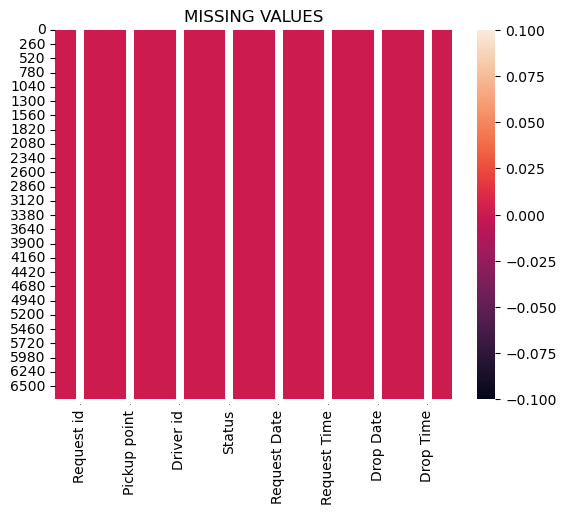

In [31]:
# Visualizing the missing values
sns.heatmap(data=df.isnull(),annot=True)        # cbar means colorbar and it Shows the color bar (legend) on the right side.
plt.title('MISSING VALUES')                                     # It does not highlight null values — it just explains what the colors mean.
plt.show()                                                     

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [33]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'Request Date',
       'Request Time', 'Drop Date', 'Drop Time'],
      dtype='object')

In [35]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,6745.000000
mean,3384.644922,3373.000000
std,1955.099667,1947.258115
min,1.000000,1.000000
25%,1691.000000,1687.000000
50%,3387.000000,3373.000000
75%,5080.000000,5059.000000
max,6766.000000,6745.000000


### Variables Description

| **Variable**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| `Request id`       | Unique identifier for each customer ride request.                               |
| `Pickup point`     | Location from where the customer requests the ride (either "City" or "Airport").|
| `Driver id`        | Unique ID of the driver assigned to the ride.                                   |
| `Status`           | Outcome of the request: `Trip Completed`, `Cancelled`, or `No Cars Available`.  |
| `Request Date`     | Date when the ride was requested (format: DD-MM-YYYY).                          |
| `Request Time`     | Time when the ride was requested (format: HH:MM:SS).                            |
| `Drop Date`        | Date when the trip ended (only for completed trips).                            |
| `Drop Time`        | Time when the trip ended (only for completed trips).                            |


### Check Unique Values for each variable.

In [43]:
# Check Unique Values for each variable.
df.nunique

<bound method DataFrame.nunique of       Request id Pickup point  Driver id             Status Request Date  \
0            619      Airport          1     Trip Completed   11-07-2016   
1            867      Airport          2     Trip Completed   11-07-2016   
2           1807         City          3     Trip Completed   12-07-2016   
3           2532      Airport          4     Trip Completed   12-07-2016   
4           3112         City          5     Trip Completed   13-07-2016   
...          ...          ...        ...                ...          ...   
6740        6745         City       6741  No Cars Available   15-07-2016   
6741        6752      Airport       6742  No Cars Available   15-07-2016   
6742        6751         City       6743  No Cars Available   15-07-2016   
6743        6754         City       6744  No Cars Available   15-07-2016   
6744        6753      Airport       6745  No Cars Available   15-07-2016   

     Request Time   Drop Date Drop Time  
0        1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [11]:
df.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1,Trip Completed,11-07-2016,11:51:00,11-07-2016,13:00:00
1,867,Airport,2,Trip Completed,11-07-2016,17:57:00,11-07-2016,18:47:00
2,1807,City,3,Trip Completed,12-07-2016,09:17:00,12-07-2016,09:58:00
3,2532,Airport,4,Trip Completed,12-07-2016,21:08:00,12-07-2016,22:03:00
4,3112,City,5,Trip Completed,13-07-2016,08:33:00,13-07-2016,09:25:00


#### Chart - 1

### What is the overall distribution of trip statuses?

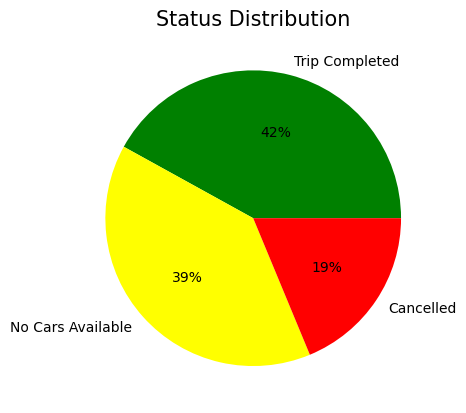

In [65]:
total_status=df['Status'].value_counts()
colors=['green','yellow','red']
plt.pie(total_status.values,labels=total_status.index,autopct='%1.0f%%',colors=colors,textprops={'fontsize': 10})  # Increase label size here
plt.title('Status Distribution',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

#### I picked a pie chart because it’s best for showing the proportion of categories — in this case, how much each trip status (like "Completed", "Cancelled", "No Cars Available") contributes to the total.

##### 2. What is/are the insight(s) found from the chart?

#### Most trip requests are completed, but a significant portion are either cancelled or have no cars available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSTITVE GROWTH
##### Yes, the insights can help create a positive business impact:
##### By identifying that many trips are not completed (due to cancellations or no cars), the company can:
##### Improve driver allocation during high-demand times.
##### Introduce incentives for drivers to reduce cancellations.
##### Predict demand patterns and optimize fleet deployment.

#### NEAGTIVE GROWTH
##### A high number of "No Cars Available" requests indicates poor supply management, especially during peak hours.
##### Too many customer or driver cancellations could mean:
##### Long wait times
##### Poor app experience
##### Dissatisfied users

#### Chart - 2

#### How does trip status vary by pickup point (City vs Airport)?

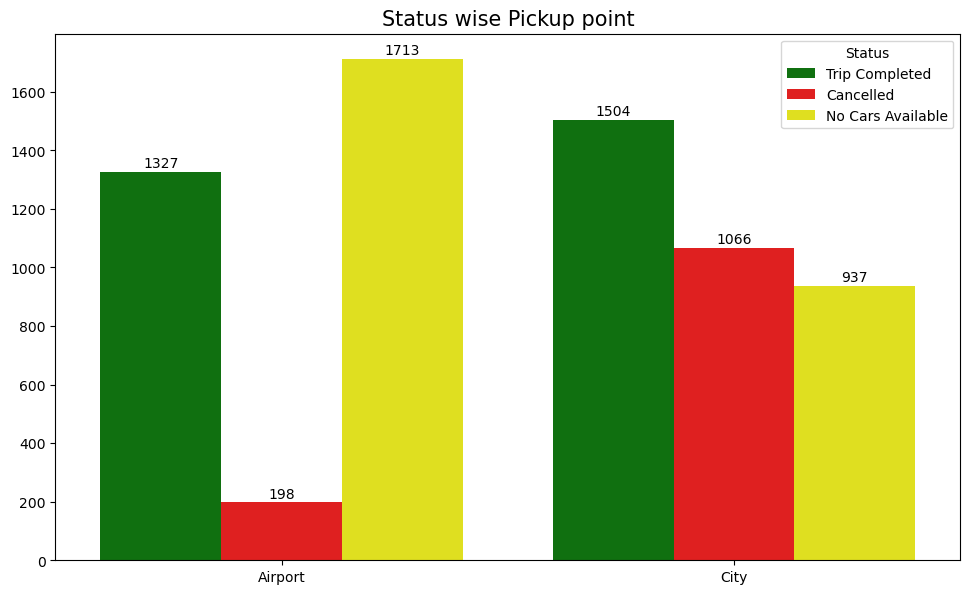

In [75]:
plt.figure(figsize=(10,6))
plot=sns.countplot(data=df,x='Pickup point',hue='Status',palette=['green','red','yellow'])
for label in plot.patches:
    height=label.get_height()
    if height==0:                # here height of cancelled is near to 0 therefore use of continue statement 
        continue
    plot.text(label.get_x()+label.get_width()/2,height+5,str(int(height)),ha='center',va='bottom')
plt.tight_layout()
plt.title('Status wise Pickup point',fontsize=15)
plot.set(xlabel=None,ylabel=None)
plt.show()

##### 1. Why did you pick the specific chart?

##### Because It clearly compares trip statuses (like Completed, Cancelled, No Cars Available) across two pickup points (City and Airport).

##### 2. What is/are the insight(s) found from the chart?

##### More trip requests come from the City than the Airport.
##### The City has a much higher number of "No Cars Available" and "Cancelled" statuses.
##### The Airport has more "Trip Completed" rides and fewer failed requests.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSITIVE GAIN 
##### Improve driver allocation during peak City hours.
##### Introduce driver incentives in high-demand zones.
##### Reduce customer wait times, improving satisfaction and retention.

#### NEGATIVE GAIN 
##### A high number of “No Cars Available” in the City means lost revenue opportunities.
##### Frequent cancellations may frustrate users, leading to:
##### Poor app reviews
##### Damaged brand reputation

#### Chart - 3

#### At what time of day are most requests made?

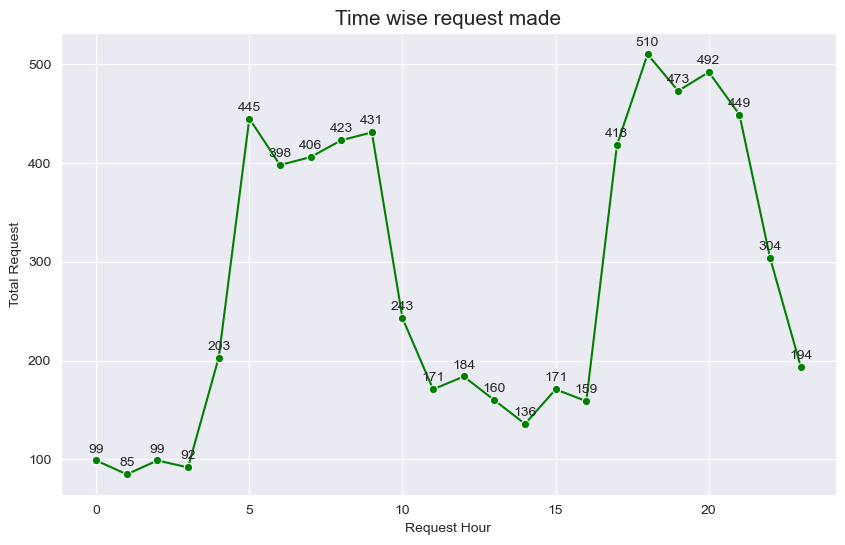

In [208]:
df['Request Time']=pd.to_datetime(df['Request Time'],format='%H:%M:%S')
df['Request hour']=df['Request Time'].dt.hour
request_made=df.groupby('Request hour')['Request id'].count().reset_index()
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plot=sns.lineplot(data=request_made,x='Request hour',y='Request id',marker='o',color='green')
x=request_made['Request hour']
y=request_made['Request id']
for i in range(len(x)):
    plt.text(x[i],y[i]+5,str(y[i]),ha='center',va='bottom')
plt.title('Time wise request made',fontsize=15)
plt.xlabel('Request Hour',fontsize=10)
plt.ylabel('Total Request',fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

##### It shows a trend across continuous values (0 to 23 hours).
##### It helps identify peak hours and demand patterns clearly.

##### 2. What is/are the insight(s) found from the chart?

####  Peak request
##### Morning hours (7 AM – 9 AM)
##### Evening hours (5 PM – 9 PM)

####  Lowest Request
##### Late night to early morning (12 AM – 4 AM)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSITIVE GAIN
##### More completed trips
##### Higher revenue
##### Improved customer satisfaction and loyalty

#### NEGATIVE GAIN
##### Driver shortage during peak hours, causing:
##### “No Cars Available” issues
##### Increased cancellations
##### Long wait times

#### Chart - 4

#### Compare number of completed trips across different hours of the day

C:\Users\dell\AppData\Local\Temp\ipykernel_15440\2969644245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=comparison,x='hour',y='Request id',palette='husl')


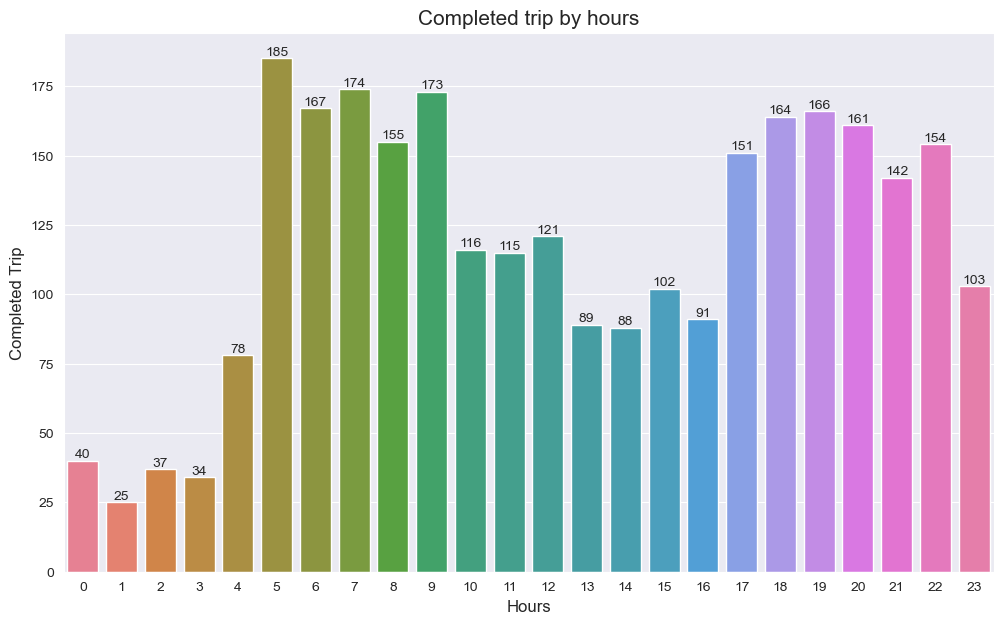

In [206]:
df['Request Time']=pd.to_datetime(df['Request Time'],format='%H:%M:%S')
df['hour']=df['Request Time'].dt.hour
plt.figure(figsize=(12,7))
completed=df[df['Status']=='Trip Completed']
comparison=completed.groupby('hour')['Request id'].count().reset_index()
plot=sns.barplot(data=comparison,x='hour',y='Request id',palette='husl')
for label in plot.patches:
    height=label.get_height()
    plot.text(label.get_x()+label.get_width()/2,height,str(int(height)),ha='center',va='bottom')
plt.title('Completed trip by hours',fontsize=15)
plt.xlabel('Hours',fontsize=12)
plt.ylabel('Completed Trip',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

##### Clear comparison: You can easily compare how many trips happened in each hour.
##### Categorical x-axis: Since hours (0–23) are discrete, bar charts show their distribution well.

##### 2. What is/are the insight(s) found from the chart?

#### High trip completion during:
##### Morning hours (7 AM – 9 AM)
##### Evening hours (5 PM – 9 PM)

#### Lower trip completion during:
##### Midnight to early morning (12 AM – 4 AM)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSITIVE GAIN
##### Optimize driver allocation during peak hours (7–9 AM, 5–9 PM) to meet higher demand.
##### Reduce wait times and cancellations by ensuring enough drivers are available when users need them most.

#### NEGATIVE GAIN
##### Driver shortage during peak times can lead to:
##### More “No Cars Available” errors Cancellations
##### Frustrated users who may switch to competitors

#### Chart - 5

#### Which time slots have the highest number of cancelled or failed requests?

C:\Users\dell\AppData\Local\Temp\ipykernel_21692\2496224273.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=combine,x='hour',y='Request id',palette='Spectral')


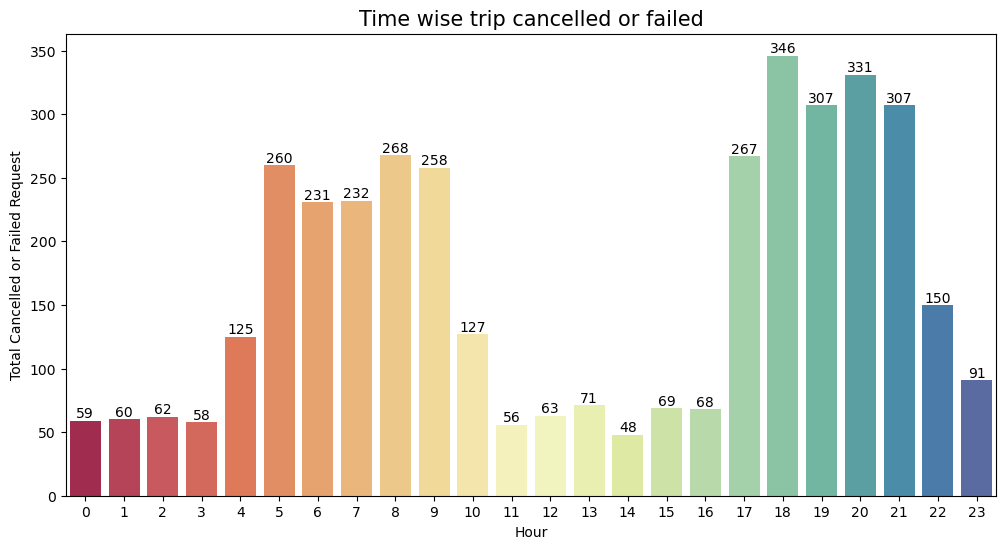

In [42]:
df['Time']=pd.to_datetime(df['Request Time'],format='%H:%M:%S')
df['hour']=df['Time'].dt.hour
filtered_case=df[(df['Status']=='Cancelled') | (df['Status']=='No Cars Available')]
combine=filtered_case.groupby('hour')['Request id'].count().reset_index()
plt.figure(figsize=(12,6))
plot=sns.barplot(data=combine,x='hour',y='Request id',palette='Spectral')
for label in plot.patches:
    height=label.get_height()
    plot.text(label.get_x()+label.get_width()/2,height,str(int(height)),ha='center',va='bottom')
plt.title('Time wise trip cancelled or failed',fontsize=15)
plt.xlabel('Hour')
plt.ylabel('Total Cancelled or Failed Request')
plt.show()

##### 1. Why did you pick the specific chart?

##### A bar chart gives a clear, side-by-side comparison of how failures vary by hour — much better than a line or pie chart for this use case.

##### 2. What is/are the insight(s) found from the chart?

#### Peak failure hours are during:
##### Morning rush (7 AM – 9 AM)
##### Evening rush (5 PM – 9 PM)

##### Low failure rates during:
##### Late night to early morning (12 AM – 5 AM)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSITIVE GAIN
##### Yes — the insights help Uber identify peak hours of failed requests, so they can:
##### Increase driver availability
##### Reduce cancellations
##### Improve customer experience and revenue

#### NEGATVIE GAIN 
##### If ignored, high failures during busy hours can lead to:
##### Lost customers
##### Missed earnings
##### Damage to Uber's reputation

#### Chart - 6

#### How do ride requests change over different days?

<function matplotlib.pyplot.show(close=None, block=None)>

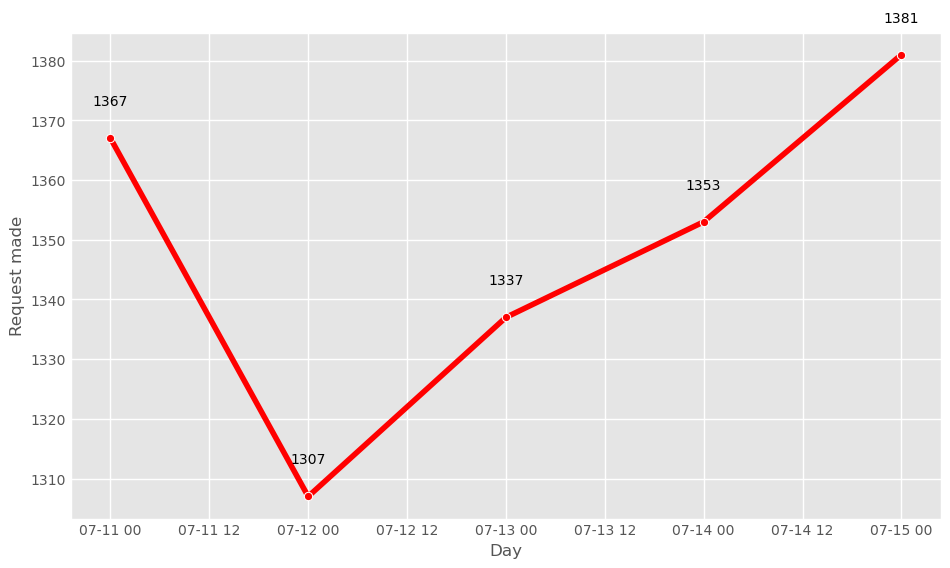

In [109]:
df['Request Date'] = pd.to_datetime(df['Request Date'], format='%d-%m-%Y')
df['day'] = df['Request Date'].dt.date
request_change_day=df.groupby('day')['Request id'].count().reset_index()
plt.figure(figsize=(10,6))
plt.style.use('ggplot') 
sns.lineplot(data=request_change_day,x='day',y='Request id',marker='o',color='red')
x=request_change_day['day']
y=request_change_day['Request id']
for i in range(len(x)):
    plt.text(x[i],y[i]+5,str(y[i]),ha='center',va='bottom',color='black')
plt.title('Day wise request')
plt.xlabel('Day')
plt.ylabel('Request made')
plt.show

##### 1. Why did you pick the specific chart?

##### A line chart is ideal because:
##### The data involves daily trends over time.
##### It shows how requests increase or decrease from day to day.
##### It helps visually track patterns, peaks, and drops across dates.

##### 2. What is/are the insight(s) found from the chart?

#### Fluctuating demand:
##### The number of trip requests varies noticeably from day to day.
#### High-demand days:
##### Certain dates show clear spikes in requests, indicating peak usage.
#### Low-demand days:
##### Some days have fewer requests, which may be weekends, holidays, or days with operational issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSITIVE GAIN
##### Understand demand patterns by day.
##### Optimize driver allocation on high-demand days.
##### Plan better for low-demand periods (e.g., offer promos on slow days).
##### Improve forecasting and overall operational efficiency.

#### NEGATIVE GAIN
##### Missed revenue if high-demand days aren’t matched with enough drivers.
##### Customer dissatisfaction from delays or unfulfilled requests.
##### Wasted resources during low-demand days if drivers are oversupplied.

#### Chart - 7

#### What are the busiest hours for pickups from the City vs the Airport?

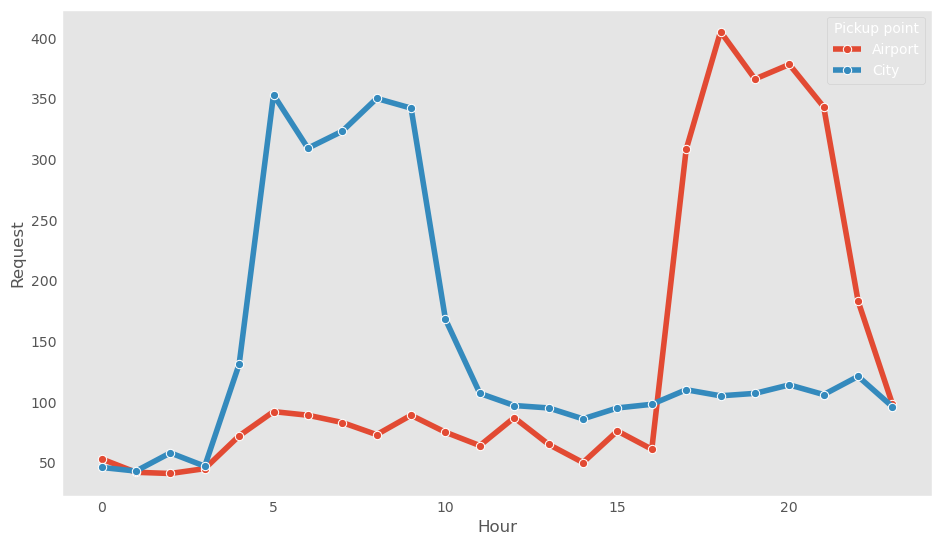

In [144]:
df['Time']=pd.to_datetime(df['Request Time'],format='%H:%M:%S')
df['hour']=df['Time'].dt.hour
plt.figure(figsize=(10,6))
pickup_hour=df.groupby(['Pickup point', 'hour'])['Request id'].count().reset_index()
plot=sns.lineplot(data=pickup_hour,x='hour',y='Request id',hue='Pickup point',marker='o')
plt.grid(False)
plt.xlabel('Hour')
plt.ylabel('Request')
plt.show()

##### 1. Why did you pick the specific chart?

##### The data compares hourly trends, which is best shown through a line chart.
##### Line charts clearly highlight changes over time (hours of the day).
##### With hue='Pickup Point', it allows easy comparison between City and Airport on the same plot.

##### 2. What is/are the insight(s) found from the chart?

##### City pickups peak during morning and evening rush hours.
##### Airport pickups are more consistent but spike slightly in the early morning.
##### City shows more variation in demand across hours compared to the Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSTIVE GAIN 
##### Helps allocate drivers efficiently based on location-specific peak hours.
##### Reduces customer wait time and improves service at high-demand hours.

#### NEGATIVE GAIN 
##### City demand peaks may be missed, leading to cancellations and lost revenue.
##### Overstaffing at the Airport during low hours can increase idle time and costs.

#### Chart-8

#### When are requests from City and Airport highest??

C:\Users\dell\AppData\Local\Temp\ipykernel_21692\728827476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(x=total_request.index, y=total_request.values, palette='Set2')


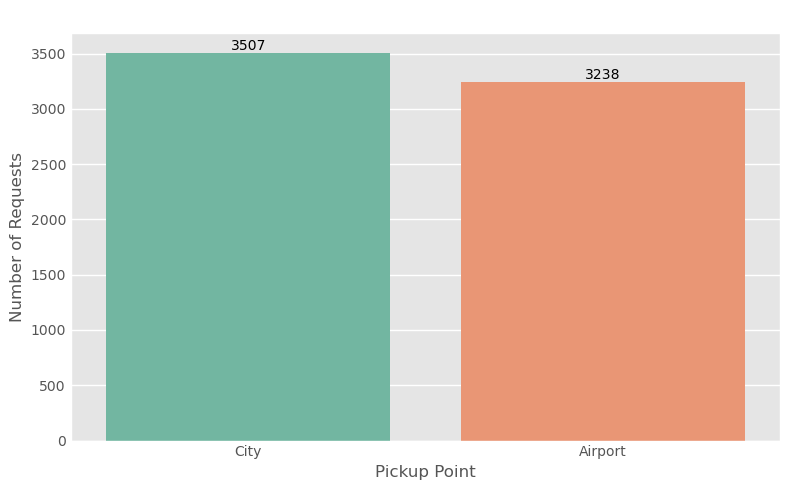

In [196]:
total_request = df['Pickup point'].value_counts()
plt.figure(figsize=(8, 5))
plot=sns.barplot(x=total_request.index, y=total_request.values, palette='Set2')
for label in plot.patches:
    height=label.get_height()
    plot.text(label.get_x()+label.get_width()/2,height,str(int(height)),ha='center',va='bottom',color='black')
plt.title('Total Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

##### A bar chart is ideal for comparing totals across categories (here: City vs Airport).
##### It shows the difference in request volume clearly and instantly.
##### Great for answering “which pickup point had more requests?”

##### 2. What is/are the insight(s) found from the chart?

##### City has more requests than Airport, indicating higher demand for pickups within the city.
##### Airport has fewer requests, but may still have consistent traffic depending on flight schedules.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### POSITIVE GAIN
##### Helps allocate more drivers in the City where demand is higher.
##### Enables better location-based resource planning, reducing wait times and cancellations.

#### NEGATIVE GAIN
##### Ignoring City demand can lead to missed trips, long wait times, and user dissatisfaction.
##### Overstaffing at the Airport despite lower demand can lead to driver idle time and inefficiency.

#### Chart - 9 - Correlation Heatmap

#### What are the busiest hours for pickups from the City vs the Airport?

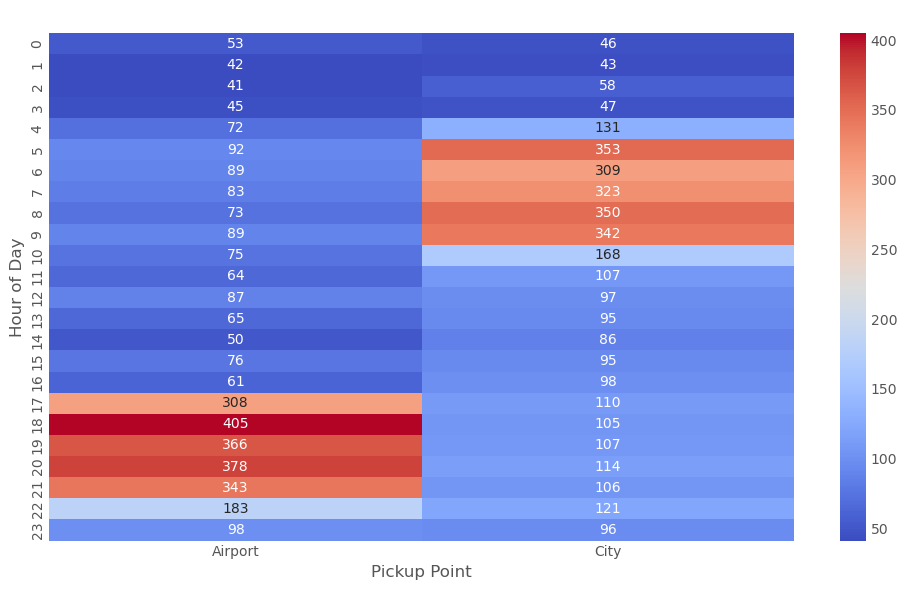

In [210]:
df['Request Time'] = pd.to_datetime(df['Request Time'], format='%H:%M:%S')
df['hour'] = df['Request Time'].dt.hour

# Create a pivot table: rows=hour, columns=pickup point, values=request count
heatmap_data = df.pivot_table(index='hour', columns='Pickup point', values='Request id', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm',fmt='.0f')
plt.title('Pickup Request Volume by Hour (City vs Airport)', fontsize=14)
plt.xlabel('Pickup Point')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

##### A heatmap is perfect for showing how values vary across two dimensions — in this case, hour and pickup location.
##### It clearly highlights which hours are busiest for each pickup point using color intensity.

##### 2. What is/are the insight(s) found from the chart?

##### City requests peak during early morning (5–9 AM) and evening (5–9 PM) — likely office commute hours.
##### Airport requests spike around early morning hours (4–6 AM), possibly due to early flights.

#### Chart - 10 - Pair Plot

#### Is there any visible relationship between trip request time, trip completion status, and pickup location?

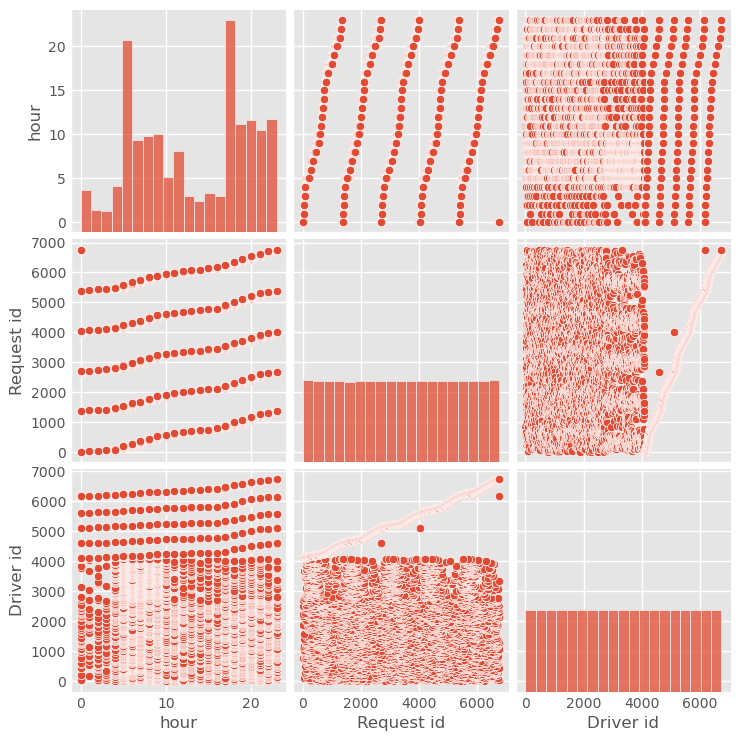

In [221]:
df['Request Time'] = pd.to_datetime(df['Request Time'], format='%H:%M:%S')
df['hour'] = df['Request Time'].dt.hour
sns.pairplot(df[['hour','Request id','Driver id']])
plt.show()

##### 1. Why did you pick the specific chart?

##### A pairplot helps explore relationships between multiple variables at once.
##### By using hue='Status', we can see how features like hour, Driver ID, and Pickup Point relate to whether a trip was completed, cancelled, or failed.

##### 2. What is/are the insight(s) found from the chart?

##### Cancelled or failed trips are more frequent during certain hours, especially peak traffic times.
##### Driver activity varies by status — some drivers complete more trips, others have more cancellations.
##### Pickup point (City vs Airport) shows different distributions for completed vs cancelled trips.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

##### Increase driver availability in high-demand areas (especially the City) during peak hours.
##### Use demand forecasting to plan driver shifts proactively.
##### Offer incentives to drivers for working in peak hours and underserved locations.
##### Improve Airport coverage during early mornings.
##### Monitor and manage driver performance to reduce cancellations.

# **Conclusion**

#### The analysis of Uber ride request data revealed clear demand patterns, peak traffic hours, and key reasons behind unfulfilled trips. Most cancellations and "No Cars Available" issues occur during peak hours in the City, highlighting the need for better driver allocation. By leveraging these insights, Uber can optimize resource distribution, reduce service failures, and improve overall customer satisfaction — leading to better operational efficiency and business growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***